# Black Friday Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVR, SVR
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
import zipfile
with zipfile.ZipFile('black_friday_data.zip', 'r') as zip_ref:
    zip_ref.extractall('D:\Pythonexe\lack friday data')

In [3]:
d_train = pd.read_csv('D:/Pythonexe/lack friday data/train_oSwQCTC (1)/train.csv')
d_test = pd.read_csv('D:/Pythonexe/lack friday data/test_HujdGe7 (1)/test.csv')

In [4]:
d_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
d_train = d_train.astype({'User_ID':'object',
                         'Occupation':'object',
                         'Product_Category_1':'object',
                         'Product_Category_2':'object',
                         'Product_Category_3':'object',
                         'Marital_Status':'object'})

In [7]:
d_train.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category_1            object
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object

In [8]:
d_train.describe(include='object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,550068,550068,550068,550068,550068,550068,550068,550068,550068,376430.0,166821.0
unique,5891,3631,2,7,21,3,5,2,20,17.0,15.0
top,1001680,P00265242,M,26-35,4,B,1,0,5,8.0,16.0
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933,64088.0,32636.0


In [9]:
d_train.describe(exclude='object')

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [10]:
d_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

---
# EDA

<AxesSubplot:ylabel='Occupation'>

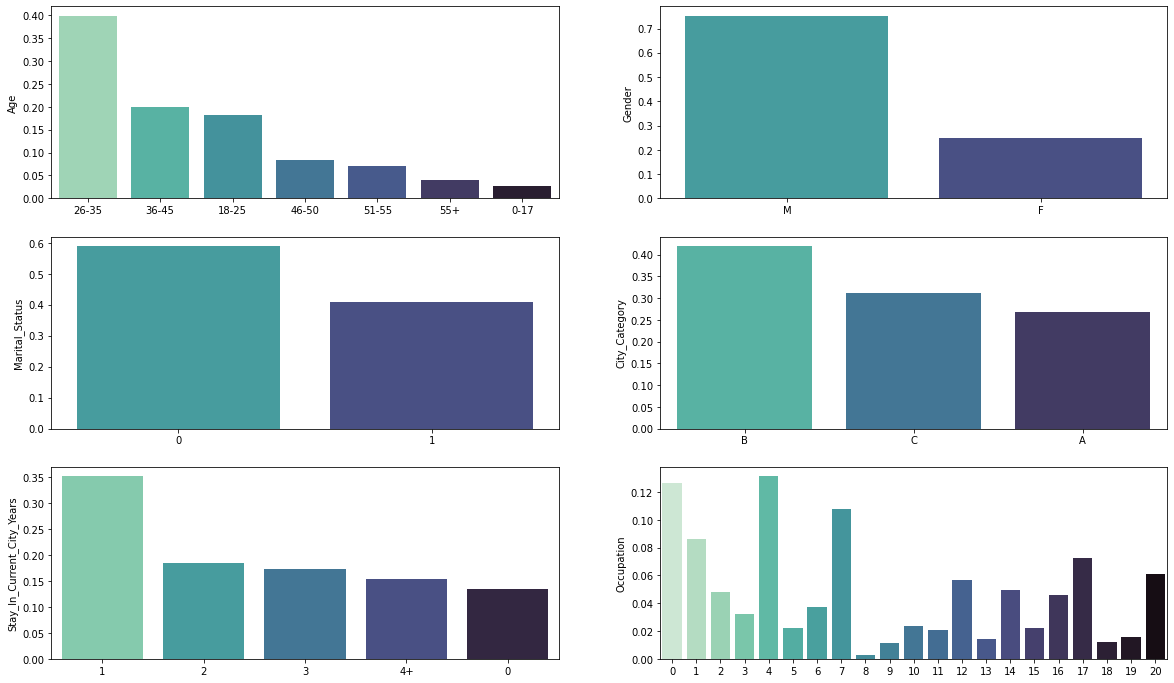

In [11]:
age_groups = d_train['Age'].value_counts(normalize=True)
gender_groups = d_train['Gender'].value_counts(normalize=True)
marital_groups = d_train['Marital_Status'].value_counts(normalize=True)
city_groups = d_train['City_Category'].value_counts(normalize=True)
city_stay_groups = d_train['Stay_In_Current_City_Years'].value_counts(normalize=True)
occupation_groups = d_train['Occupation'].value_counts(normalize=True)
fig,ax = plt.subplots(figsize=(20,12),ncols=2,nrows=3)
sns.barplot(x=age_groups.index, y=age_groups, palette='mako_r', ax=ax[0,0])
sns.barplot(x=gender_groups.index, y=gender_groups, palette='mako_r', ax=ax[0,1])
sns.barplot(x=marital_groups.index, y=marital_groups, palette='mako_r', ax=ax[1,0])
sns.barplot(x=city_groups.index, y=city_groups, palette='mako_r', ax=ax[1,1])
sns.barplot(x=city_stay_groups.index, y=city_stay_groups, palette='mako_r', ax=ax[2,0])
sns.barplot(x=occupation_groups.index, y=occupation_groups, palette='mako_r', ax=ax[2,1])

<AxesSubplot:ylabel='Product_Category_1'>

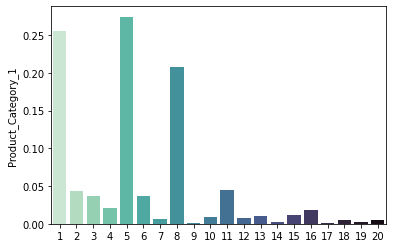

In [12]:
prod1_groups = d_train['Product_Category_1'].value_counts(normalize=True)
sns.barplot(x=prod1_groups.index, y=prod1_groups, palette='mako_r')

<AxesSubplot:xlabel='Gender'>

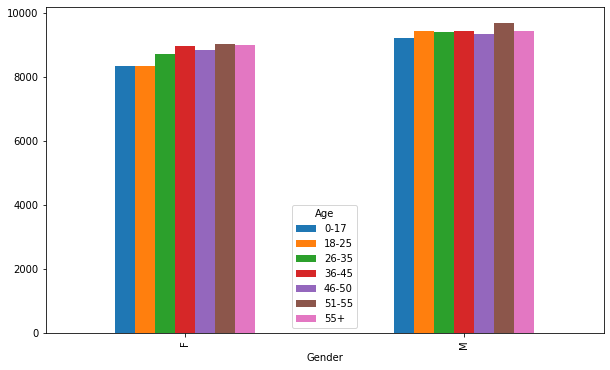

In [13]:
purchase_groups = d_train.groupby(['Gender', 'Age'])['Purchase'].agg('mean')
purchase_groups.unstack().plot(kind='bar',figsize=(10,6))

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

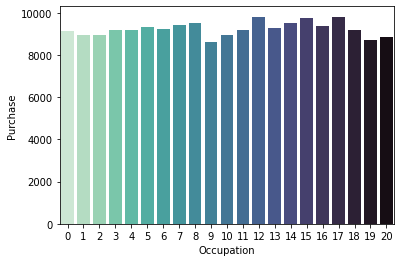

In [14]:
pur_occup = d_train.groupby('Occupation')['Purchase'].agg('mean').sort_values(ascending=False)
sns.barplot(x=pur_occup.index, y=pur_occup, palette='mako_r')

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
4+    9275.598872
3     9286.904119
2     9320.429810
Name: Purchase, dtype: float64


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

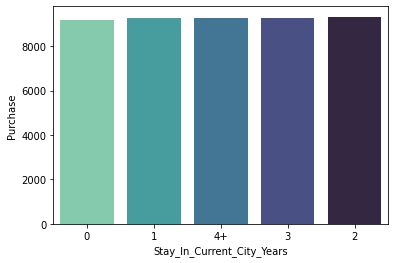

In [15]:
pur_stay_in_city = d_train.groupby('Stay_In_Current_City_Years')['Purchase'].agg('mean').sort_values(ascending=True)
print(pur_stay_in_city)
sns.barplot(x=pur_stay_in_city.index, y=pur_stay_in_city, palette='mako_r')

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

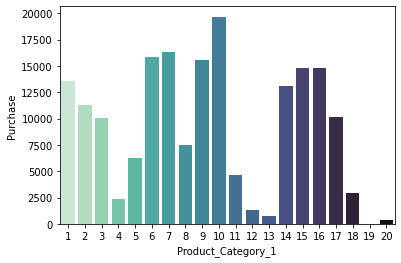

In [16]:
pur_prod1 = d_train.groupby('Product_Category_1')['Purchase'].agg('mean').sort_values(ascending=False)
sns.barplot(x=pur_prod1.index, y=pur_prod1, palette='mako_r')

Marital_Status
1    9261.174574
0    9265.907619
Name: Purchase, dtype: float64


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

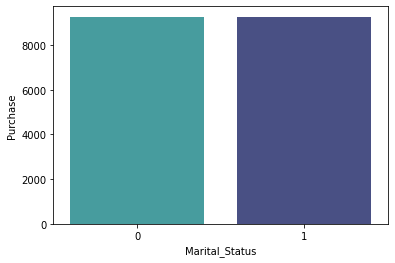

In [17]:
pur_marital = d_train.groupby('Marital_Status')['Purchase'].agg('mean').sort_values(ascending=True)
print(pur_marital)
sns.barplot(x=pur_marital.index, y=pur_marital, palette='mako_r')

In [18]:
group_mar_prod = d_train.groupby(['Marital_Status', 'Product_Category_1'])['Purchase'].agg('mean')
print(group_mar_prod.unstack(level=0), group_mar_prod.unstack(level=0).idxmax())

Marital_Status                 0             1
Product_Category_1                            
1                   13589.273979  13631.747621
2                   11176.195926  11362.032490
3                   10026.934137  10206.497835
4                    2308.021318   2363.596809
5                    6223.850874   6263.845407
6                   15864.705165  15800.245707
7                   16413.877941  16307.209994
8                    7483.958707   7519.181597
9                   15880.939271  15016.760736
10                  19665.580634  19687.395824
11                   4725.172893   4624.418235
12                   1349.728122   1352.063251
13                    725.028779    718.919145
14                  13084.705674  13212.754801
15                  14766.290091  14799.689914
16                  14745.534570  14794.501337
17                  10132.416107  10211.567857
18                   3000.173065   2942.666442
19                     37.272727     36.709285
20           

Najwięcej kupowana grupa produktów wśród nieżonatych to 9, natomiast wśród zamężnych to 2.


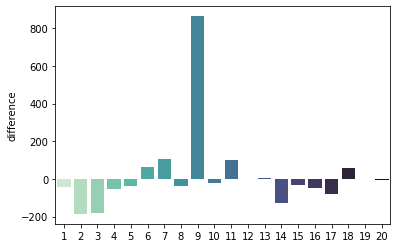

In [19]:
diff=[]
for i, j in zip(group_mar_prod.unstack(level=0)[0], group_mar_prod.unstack(level=0)[1]):
    diff.append(i - j)

diff = pd.DataFrame(diff, index=np.arange(1,21).astype('str'), columns=['difference'])
sns.barplot(x = diff.index, y=diff['difference'], palette='mako_r')
print('Najwięcej kupowana grupa produktów wśród nieżonatych to {}, natomiast wśród zamężnych to {}.'.format(diff.idxmax()[0], diff.idxmin()[0]))

In [20]:
pd.crosstab(d_train['Marital_Status'], d_train['Product_Category_1'])

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Marital_Status,,,,,,,,,,,,,,,,,,,,
0,84375,14138,12359,7177,89656,12139,2040,65411,247,2778,14668,2034,3162,846,3623,5713,298,1641,946,1480
1,56003,9726,7854,4576,61277,8327,1681,48514,163,2347,9619,1913,2387,677,2667,4115,280,1484,657,1070


In [21]:
d_train.groupby(['Marital_Status', 'Age'])['Purchase'].agg('count')

Marital_Status  Age  
0               0-17      15102
                18-25     78544
                26-35    133296
                36-45     66377
                46-50     12690
                51-55     10839
                55+        7883
1               18-25     21116
                26-35     86291
                36-45     43636
                46-50     33011
                51-55     27662
                55+       13621
Name: Purchase, dtype: int64

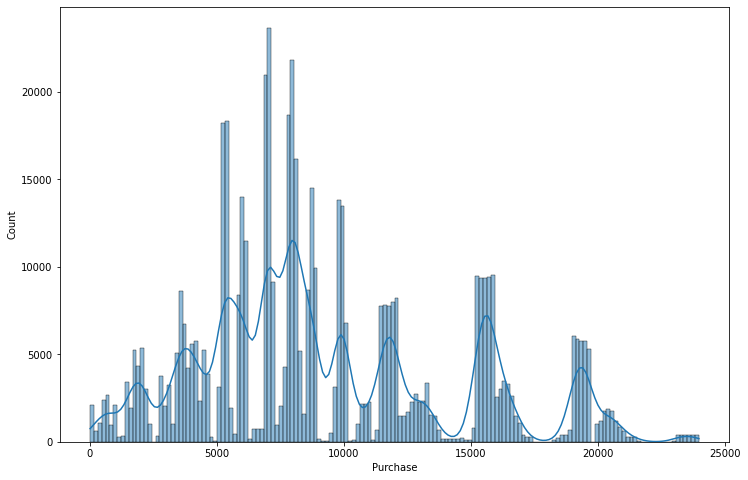

In [41]:
from numpy.random import normal
plt.figure(figsize=(12,8))
sns.histplot(d_train['Purchase'], kde=True)
fit = normal(d_train['Purchase'].mean(),d_train['Purchase'].std(), len(d_train['Purchase']))

In [22]:
d_train['Product_Category_2'].fillna(d_train['Product_Category_2'].mode()[0],inplace=True)
d_train['Product_Category_3'].fillna(d_train['Product_Category_3'].mode()[0],inplace=True)
d_test['Product_Category_2'].fillna(d_test['Product_Category_2'].mode()[0],inplace=True)
d_test['Product_Category_3'].fillna(d_test['Product_Category_3'].mode()[0],inplace=True)
d_train = d_train.astype({'User_ID':'int64',
                         'Occupation':'int64',
                         'Marital_Status':'int64',
                         'Product_Category_1':'int64',
                         'Product_Category_2':'int64',
                         'Product_Category_3':'int64'})

In [23]:
le=LabelEncoder()
d_train['Product_ID']=le.fit_transform(d_train['Product_ID'])
d_test['Product_ID']=le.fit_transform(d_test['Product_ID'])

In [24]:
columns=[]
for col in d_train.columns:
    if d_train[col].dtypes=='object':
        columns.append(col)
columns

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [25]:
train_encode=pd.get_dummies(d_train,columns=columns,dtype=np.uint8)
test_encode=pd.get_dummies(d_test,columns=columns,dtype=np.uint8)

In [26]:
y=np.log(train_encode['Purchase'])
X=train_encode.drop(['Purchase'],axis=1)
col=X.columns
ind=X.index
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=col, index=ind)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=X['User_ID'])

In [27]:
#pipe = Pipeline([('scaler',StandardScaler()),('svr',LinearSVR())])

In [28]:
#params = {'svr__C':np.linspace(0.001,10,5)}
#grid_search = GridSearchCV(estimator = pipe, param_grid=params ,cv=3,scoring='neg_mean_squared_error').fit(X_train,y_train)
lin_svr = LinearSVR(C=10).fit(X_train,y_train)
y_pred = lin_svr.predict(X_test)
mean_squared_error(y_test, y_pred)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.46334243521338025

In [29]:
print(np.exp(y_test), np.exp(y_pred))

441664    11749.0
24991      4688.0
216375    15562.0
410623    19302.0
391670     6875.0
           ...   
495724     4652.0
33153      3583.0
445759     8091.0
212939     3071.0
307422     8129.0
Name: Purchase, Length: 165021, dtype: float64 [10802.67285302  4972.38064628 11783.25355633 ...  6274.42709262
  5666.77924102  5657.45089508]


In [280]:
#print(grid_search.best_params_, grid_search.best_score_)

In [30]:
xgb=XGBRegressor(random_state=1,n_estimators= 61, max_depth=11)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print(mean_squared_error(y_test,y_pred))
result=xgb.predict(test_encode)
result = np.exp(result)
print(result)

0.10917363919869583
[12528.394    7121.641     180.74442 ... 15952.457     215.09953
   207.07455]


In [31]:
mean_squared_error(np.exp(y_test), np.exp(y_pred))

6802083.327744824

In [32]:
print(np.exp(y_test), np.exp(y_pred))

441664    11749.0
24991      4688.0
216375    15562.0
410623    19302.0
391670     6875.0
           ...   
495724     4652.0
33153      3583.0
445759     8091.0
212939     3071.0
307422     8129.0
Name: Purchase, Length: 165021, dtype: float64 [10052.869   3933.311  14088.847  ...  7842.3193  4441.432   7816.44  ]
